In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
#!pip install tensorflow


In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

# DATA IMPORT

In [3]:
import tensorflow as tf

In [4]:

file="all-data.csv"

# Detect encoding
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [5]:
df=pd.read_csv(file,encoding='Windows-1252',header=None)

In [6]:
df.head()

,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [7]:
mycolumns = ['Sentiment','Sentence']

df.columns=mycolumns

In [8]:
pf=df[['Sentence','Sentiment']]

In [9]:
pf.head()

,Sentence,Sentiment
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive


# DATA PREPARATION

In [10]:
 pf['Sentence']=pf["Sentence"].str.lower()

In [11]:
pf['Sentiments'] = pf['Sentiment'].map({'neutral':0,'positive':1,'negative':-1})

# TF-IDF IMPLEMENTATION

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

analyze = vectorizer.build_analyzer()

In [13]:
vectorizer.fit(pf["Sentence"])

features=vectorizer.transform(pf["Sentence"])

final=pd.DataFrame(features.todense(), columns = vectorizer.get_feature_names())

final['Sentiment']=pf['Sentiments']

In [14]:
final.head()

,00,000,000063,002,0025,003,0030,007,008,01,...,ærnits,ærtsil,ærvi,ærvinen,æsein,æskyl,ætehuolto,ðl,ˆeur,Sentiment
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.147059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [15]:
final.describe()

,00,000,000063,002,0025,003,0030,007,008,01,...,ærnits,ærtsil,ærvi,ærvinen,æsein,æskyl,ætehuolto,ðl,ˆeur,Sentiment
count,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,...,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000,4846.000000
mean,0.001026,0.007455,0.000058,0.000074,0.000048,0.000050,0.000042,0.000095,0.000078,0.000613,...,0.000047,0.000238,0.000363,0.000104,0.000060,0.000057,0.000063,0.000095,0.000066,0.156624
std,0.015828,0.041798,0.004017,0.005170,0.003336,0.003453,0.002890,0.006592,0.005395,0.013120,...,0.003244,0.008483,0.010453,0.007254,0.004152,0.003980,0.004407,0.006622,0.004569,0.617616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.345644,0.561153,0.279671,0.359932,0.232234,0.240369,0.201161,0.458920,0.375585,0.466995,...,0.225802,0.335597,0.347404,0.504985,0.289021,0.277057,0.306802,0.460949,0.318089,1.000000


In [16]:
final.Sentiment.sum()

759

#  Data Cleaning

In [17]:
final = final.drop(final.columns[final.sum() < 0.5], axis=1)
#final['Sentiment'] = Doc[0]

# TEST - TRAIN SPLIT

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X = final.drop('Sentiment',axis=1)
y = final['Sentiment']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# RANDOM FOREST IMPLEMENTATION AND TUNING

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score,mean_absolute_error,mean_squared_error


In [22]:
test_error = []

for n in range(1,10):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
    print(accuracy_score(test_preds,y_test)*100)

60.824742268041234
62.68041237113402
64.3298969072165
67.62886597938144
72.37113402061856
70.9278350515464
69.48453608247422
71.1340206185567
72.78350515463917


In [23]:
test_error = []

for n in range(1,10):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='sqrt')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
    print(accuracy_score(test_preds,y_test)*100)

61.855670103092784
61.855670103092784
64.3298969072165
68.04123711340206
69.27835051546391
70.10309278350515
70.10309278350515
70.10309278350515
71.34020618556701


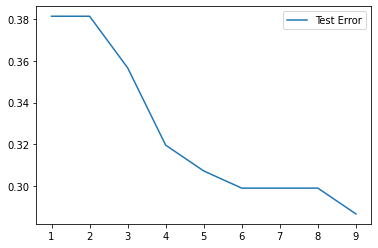

In [24]:
plt.plot(range(1,10),test_error,label='Test Error')
plt.legend()

In [25]:
model = RandomForestClassifier(n_estimators=9,max_features='auto',random_state=101)

model.fit(X_train,y_train)

pred_RF = model.predict(X_test)

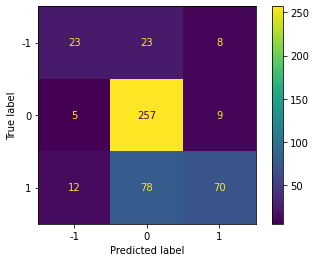

In [26]:
plot_confusion_matrix(model,X_test,y_test)

#### MODEL TUNING

In [27]:
from sklearn.model_selection import GridSearchCV        # takes much time to run on pc

n_estimators=[64,100,128,200]
max_features= ['auto','sqrt']


param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             }  

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

grid.fit(X_train,y_train)

grid.best_params_

KeyboardInterrupt: 

# XGB IMPLEMENTATION

In [54]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/Users/raghavaggarwal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:42:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 77.32%


# NEURAL NETWORK IMPLEMENTATION

In [31]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [33]:
X_train_scaled = scaler.transform(X_train)

X_test_scaled  = scaler.transform(X_test)

In [34]:
model = Sequential()

In [35]:
model.add(Dense(4,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

In [36]:
model.compile(optimizer = 'adam',loss='mse')

model.fit(X_train_scaled,y_train,epochs=50,batch_size=256)

Epoch 1/50
18/18 [==============================] - 1s 4ms/step - loss: 0.3926
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 0.3676
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 0.3409
Epoch 4/50
18/18 [==============================] - 0s 5ms/step - loss: 0.3068
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 0.2661
Epoch 6/50
18/18 [==============================] - 0s 6ms/step - loss: 0.2275
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 0.1942
Epoch 8/50
18/18 [==============================] - 0s 5ms/step - loss: 0.1682
Epoch 9/50
18/18 [==============================] - 0s 5ms/step - loss: 0.1487
Epoch 10/50
18/18 [==============================] - 0s 5ms/step - loss: 0.1330
Epoch 11/50
18/18 [==============================] - 0s 7ms/step - loss: 0.1209
Epoch 12/50
18/18 [==============================] - 0s 5ms/step - loss: 0.1094
Epoch 13/50
18/18 [==============================

<AxesSubplot:>

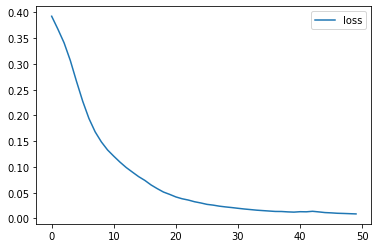

In [37]:
loss= pd.DataFrame(model.history.history)
loss.plot()

In [38]:
#model.evaluate(X_test_scaled,y_test,verbose=0)

pred_nn =model.predict(X_test_scaled)

#checking for errors



In [39]:
mean_squared_error(y_test,pred_nn)

0.35854628210683276

## NEURAL NETWORKS AFTER  LABEL ENCODING

In [40]:
## This is made seperate as we have used label encoding which is different than previous 3 models

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [41]:
all_labels = pf['Sentiment'].values

In [42]:
all_inputs = X.values

In [45]:
encoder = LabelEncoder()
encoder.fit(all_labels)
encoded_Y = encoder.transform(all_labels) 

dummy_y = np_utils.to_categorical(encoded_Y)

In [46]:
model = Sequential()
model.add(Dense(64, input_dim=all_inputs.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(all_inputs,dummy_y, test_size=0.1, random_state=101)

In [48]:
train_x = np.asarray(X_train_encoded)
train_y = np.asarray(y_train_encoded)
validation_x = np.asarray(X_test_encoded)
validation_y = np.asarray(y_test_encoded)

In [49]:
model.fit(train_x,train_y, epochs=30)

Epoch 1/30
137/137 [==============================] - 1s 3ms/step - loss: 0.9221 - accuracy: 0.6044
Epoch 2/30
137/137 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.7290
Epoch 3/30
137/137 [==============================] - 1s 5ms/step - loss: 0.3646 - accuracy: 0.8461
Epoch 4/30
137/137 [==============================] - 0s 3ms/step - loss: 0.2364 - accuracy: 0.9330
Epoch 5/30
137/137 [==============================] - 0s 2ms/step - loss: 0.1657 - accuracy: 0.9704
Epoch 6/30
137/137 [==============================] - 0s 4ms/step - loss: 0.1310 - accuracy: 0.9860
Epoch 7/30
137/137 [==============================] - 0s 3ms/step - loss: 0.1101 - accuracy: 0.9904
Epoch 8/30
137/137 [==============================] - 0s 3ms/step - loss: 0.1018 - accuracy: 0.9906
Epoch 9/30
137/137 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.9904
Epoch 10/30
137/137 [==============================] - 1s 4ms/step - loss: 0.0797 - accuracy: 0.9915

In [50]:
pred_train = model.predict(train_x)
scores = model.evaluate(train_x, train_y, verbose=0)
print('Accuracy on training data: {} \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(validation_x)
scores2 = model.evaluate(validation_x, validation_y, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))   

Accuracy on training data: 0.9944967031478882 
 Error on training data: 0.005503296852111816
Accuracy on test data: 0.7237113118171692 
 Error on test data: 0.2762886881828308


# Decision Trees


In [51]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 15).fit(X_train,y_train)
y_pred = dtree.predict(X_test)

In [53]:
count = 0
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0)) 

Accuracy: 67.84%
